<a href="https://colab.research.google.com/github/rafaelgrecco/DS-ML-Projects/blob/master/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center><img alt="Analisando Airbnb" width="30%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

# Análise dos Dados do Airbnb - Rio de Janeiro

Acredito que muitas pessoas sabem o que é o [Airbnb](https://www.airbnb.com.br/) e até mesmo já usou seus serviços, essa que já é considerada a maior empresa hoteleira da atualidade, tem a missão de conectar pessoas que querem se hospedar a viagem ou a trabalho, com anfitriões que desejam alugar seus imóveis, ou apenas quartos. Ou seja, todos os lados se beneficiam, a pessoa que quer viajar consegue preços mais atrativos, do que redes hoteleiras convencionais e a pessoa que tem um imóvel consegue uma renda extra. Atualmente existem mais de 6 milhões de acomodações registradas na plataforma do Airbnb.

In [1]:
# bibliotecas que serão utilizdas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
mpl.style.use('ggplot')
plt.style.use('fivethirtyeight')
sns.set(context='notebook', palette='dark', style='whitegrid')
pallete_color = ['#A3D9FF', '#7E6B8F', '#984447', '#468C98']
pallete_10 = ["#468C98","#9d8df1","#b8cdf8","#95f2d9","#1cfeba","#dcedb9","#d2e59e",
              "#cbd081","#e7ad99","#ce796b"]

Com o comando `palplot` da biblioteca seaborn, podemos visualizar as paletas de cores que setamos para montar os gráficos, sinta-se a vontade para alterar essas cores, recomendo fortemente o site [Coolors](https://coolors.co/) que tem milhares de paletas de cores a sua disposição

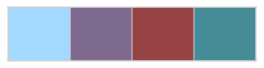

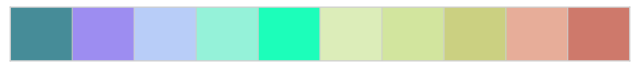

In [3]:
# paleta de cores
sns.palplot(pallete_color)
sns.palplot(pallete_10)

## *Conhecendo o banco de dados*

Aqui vamos importar o nosso banco de dados, e usar a Biblioteca Pandas para o ler, além disso vamos visualizar as 5 primeiras entradas do dataset

### *Dicionário das Variáveis*

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

In [4]:
# importando e lendo nosso banco de dados
data = 'http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-07-17/visualisations/listings.csv'
df = pd.read_csv(data)

# visualizando as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,170,5,265,2021-05-21,2.11,1,317
1,24480,Nice and cozy near Ipanema Beach,99249,Goya,NaN,Ipanema,-22.98405,-43.20189,Entire home/apt,283,3,85,2017-04-22,0.88,1,154
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97735,-43.19105,Entire home/apt,160,7,238,2019-04-27,1.89,2,316
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98839,-43.19232,Entire home/apt,256,2,181,2019-12-06,1.97,1,167
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98107,-43.19136,Entire home/apt,120,3,363,2019-06-15,3.05,1,92


## *Análise Exploratória dos dados*

In [5]:
# Quantidade de linhas e colunas do banco de dados
print('Entradas: {} \t'.format(df.shape[0]))
print('Colunas/Variáveis: {} \t'.format(df.shape[1]))

Entradas: 23635 	
Colunas/Variáveis: 16 	


In [6]:
# informações a respeito do tipo de dado das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23635 entries, 0 to 23634
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              23635 non-null  int64  
 1   name                            23614 non-null  object 
 2   host_id                         23635 non-null  int64  
 3   host_name                       23628 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   23635 non-null  object 
 6   latitude                        23635 non-null  float64
 7   longitude                       23635 non-null  float64
 8   room_type                       23635 non-null  object 
 9   price                           23635 non-null  int64  
 10  minimum_nights                  23635 non-null  int64  
 11  number_of_reviews               23635 non-null  int64  
 12  last_review                     

In [7]:
# informações estatísticas sobre o banco de dados
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month
count,23635.000000,23635.000000,23635.000000,14980.000000
mean,751.329300,4.919018,13.207489,0.602536
std,5477.207312,20.702676,31.962546,0.864291
min,0.000000,1.000000,0.000000,0.010000
25%,150.000000,1.000000,0.000000,0.090000
50%,256.000000,2.000000,2.000000,0.240000
75%,511.000000,4.000000,10.000000,0.790000
max,586229.000000,1100.000000,466.000000,26.960000


É possível analisar com base no resultado anterior a presente de outliers em algumas variáveis, como na variável preço, temos uma média de 751 e um desvio padrão de 5477, ou seja temos um gráfico de distribuição em que os dados estão muito dispersos.

In [8]:
# verificando a existência de valores ausentes
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

neighbourhood_group               100.000000
reviews_per_month                  36.619420
last_review                        36.619420
name                                0.088851
host_name                           0.029617
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

É possível notar que duas variáveis *reviews_per_month* e *last_review* possuem avárias em seus dados, ou seja, há dados faltanetes, no entanto como não vamos elaborar um modelo, vamos manter esses dados faltantes, um vez que exluir as linhas que os contem seria uma perda bem grande de dados, já que quase 40% do seu total está faltando.

In [9]:
# bairros com maiores concentração de casas
df['neighbourhood'].value_counts().sort_values(ascending=False)[:10]

Copacabana                  6811
Barra da Tijuca             2435
Ipanema                     2290
Jacarepaguá                 1207
Leblon                      1085
Recreio dos Bandeirantes    1080
Botafogo                    1026
Santa Teresa                 895
Centro                       643
Flamengo                     542
Name: neighbourhood, dtype: int64

In [10]:
# plot bairros com maiores concentração de casas
fig = px.pie(df, values= df['neighbourhood'].value_counts().sort_values(ascending=False)[:10],
             names=['Copacabana', 'Barra da Tijuca', 'Ipanema', 'Jacarepaguá', 'Leblon', 
                    'Recreio dos Bandeirantes ', 'Botafogo', 'Santa Teresa', 'Centro', 'Flamengo'],
            hole=0.5, color_discrete_sequence=pallete_10)

fig.add_annotation(text='10 localidades com<br> mais ofertas', x=0.5, y=0.5, showarrow=False,
                   font_size=14, font_family='monospace', opacity=0.8)
fig.show()

In [11]:
# remover outliers
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

#remover a coluna neighbourhood_group, pois está vazia
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

In [12]:
# distribuição da variável de preço após retirada de outliers
fig = px.histogram(df_clean, x='price', marginal='box', opacity=0.6, nbins=15,
                   color_discrete_sequence=[pallete_color[3]], histfunc='count', 
                   barmode='group', template='plotly_white')

fig.add_annotation(text='Podemos considerar que preços acima de 1000 ainda são outliers<br> Observe que 75% dos valores estão abaixo de 450',
                   x=1000, y=5000, showarrow=False, font_size=12, font_family='monospace', opacity=0.8)

fig.update_layout(title=dict(
    text='Distribuição da Variável Preço',
    x=0.5, y=0.95
), font_family='monospace')

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [13]:
# distribuição da variável de noites mínimas após retirada de outliers
fig = px.histogram(df_clean, x='minimum_nights', marginal='box', opacity=0.7, nbins=10,
                   color_discrete_sequence=[pallete_color[3]], histfunc='count',
                   barmode='group', template='plotly_white')

fig.update_layout(title=dict(
    text='Distribuição da Variável Noites Mínimas',
    x=0.5, y=0.95), font_family='monospace')

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [14]:
# definindo a tabela de correlação
corr_matrix = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']].corr()
display(corr_matrix)

,price,minimum_nights,number_of_reviews,reviews_per_month
price,1.000000,0.133954,-0.160485,-0.158233
minimum_nights,0.133954,1.000000,-0.068339,-0.094496
number_of_reviews,-0.160485,-0.068339,1.000000,0.637832
reviews_per_month,-0.158233,-0.094496,0.637832,1.000000


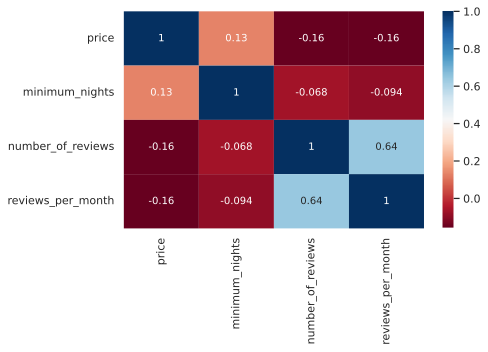

In [28]:
# plotando um mapa de calor
fig = sns.heatmap(corr_matrix, cmap='RdBu', linecolor='white', annot=True)

In [16]:
# porcentagem de tipos de quartos mais alugados no Airbnb
(df_clean.room_type.value_counts() / df_clean.room_type.value_counts().sum())*100

Entire home/apt    71.236694
Private room       26.026771
Shared room         2.357348
Hotel room          0.379186
Name: room_type, dtype: float64

In [17]:
# gráfico do tipo de quarto mais alugado
fig = px.histogram(df_clean, x='room_type', opacity=0.8, nbins=4,
                   color_discrete_sequence=[pallete_10[9]],
                   histfunc='count', template='plotly_white', labels={'room_type':'Tipos de Quartos'})

fig.add_annotation(text='71,23%', x=0, y=17700, showarrow=False, 
                   font_size=20, font_family='monospace', opacity=0.7)
fig.add_annotation(text='26,02%', x=1, y=6400, showarrow=False,
                   font_size=20, font_family='monospace', opacity=0.7)
fig.add_annotation(text='2,35%', x=2, y=1000, showarrow=False,
                   font_size=20, font_family='monospace', opacity=0.7)
fig.add_annotation(text='0,379%', x=3, y=580, showarrow=False,
                   font_size=20, font_family='monospace', opacity=0.7)

fig.update_yaxes(showgrid=False)
fig.update_xaxes(showgrid=False)

fig.update_layout(title=dict(text='Qual o tipo de quarto mais alugado?', x=0.5, y=0.95),
                  font_family='monospace', yaxis_title_text='')

fig.show()

In [18]:
# as 10 regiões com alguel mais caro
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Caju                  1208.000000
Anchieta               800.000000
Vaz Lobo               789.500000
Realengo               711.500000
Pavuna                 590.666667
Sepetiba               556.500000
Rocha Miranda          551.000000
Joá                    524.864865
Complexo do Alemão     520.000000
Lagoa                  507.689840
Name: price, dtype: float64

In [33]:
print(df[df.neighbourhood == 'Caju'].shape)

(1, 16)


In [32]:
df[df['neighbourhood'] == 'Caju']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
15568,38109801,You FYI yonder was that good,35690302,JungHo,NaN,Caju,-22.89588,-43.21316,Entire home/apt,1208,1,0,NaN,NaN,1,365


In [20]:
px.set_mapbox_access_token('pk.eyJ1IjoicmFmYWVsZ3JlY2NvIiwiYSI6ImNrdG1ja2psNzFpbjIyb3BkbTJ3YW1pZDIifQ.Z-i8VWNhnWgKfM0RR-rM0w')

fig = px.scatter_mapbox(df_clean, lat='latitude', lon='longitude', color='price',
                        color_continuous_scale=pallete_10, size_max=15,
                        zoom=10, hover_name='neighbourhood')

fig.show()

## Wordcloud

In [21]:
summary = df.dropna(subset=['name'], axis=0)['name']

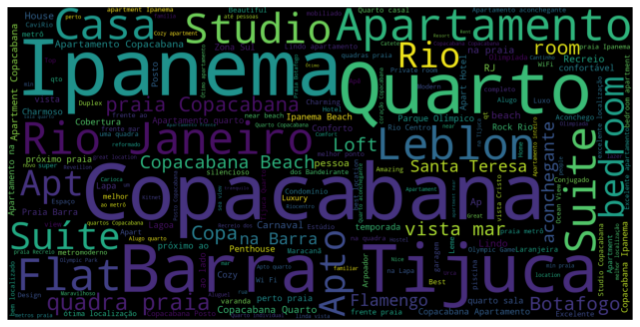

In [36]:
all_summary = " ".join(s for s in summary)

stopwords = set(STOPWORDS)
stopwords.update(['da', 'meu', 'em', 'para', 'você', 'os', 'de'])

wordcloud = WordCloud(stopwords=stopwords,
                      width=1600, height=800, 
                      max_font_size=200).generate(all_summary)

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);